## Signals definition

In [3]:
# Unit rect (rect)
def unit_rect(x):
  if abs(x) > 0.5:
    return 0.0
  elif abs(x) == 0.5:
    return 0.5
  else:
    return 1.0

# Half rect (rect(x/2))
def rect_x_2(x):
  return(unit_rect(x/2.0))

# Unit step function
def unit_step(x):
  if x > 0.0:
    return 1.0
  else:
    return 0.0

# Unit step with offset 1 (u(x-1))
def unit_step_1(x):
  return unit_step(x-1)

### Draw the functions

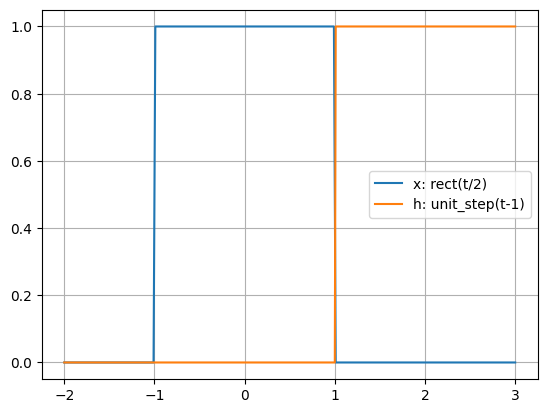

In [4]:
# Draw the functions
import matplotlib.pyplot as plt

x_range = [x/100.0 for x in range(-200, 301)]

# Our x and h functions
x_func = rect_x_2
h_func = unit_step_1

# Draw those functions
x_values = list(map(x_func, x_range))
h_values = list(map(h_func, x_range))

plt.plot(x_range, x_values, label='x: rect(t/2)')
plt.plot(x_range, h_values, label='h: unit_step(t-1)')
plt.legend()
plt.grid()

In [5]:
## Define Convolution

In [6]:
# Default range to include x values that results in non-zero value of the function
RANGE_DEFAULT = [-100.0, 100.0]

def convolve(f, g, x_range, dx = 0.01, f_nonzero_range = RANGE_DEFAULT, g_nonzero_range = RANGE_DEFAULT):
  '''
  Convolve two functions (f, g) and output the result in specified x_range.
  Result will be a list of numbers the length equal to x_range itself.

  dx = granuality of the variable x for the integration itself. By default it
  is in a sane range of 0.01, assuming that functions are mostly rectangular /
  unit step, etc, which doesn't change much within the range of dx, except for
  at non-continuous boundaries

  NOTE: 
  To make computation more efficient, we can optionally supply the nonzero range for both
  functions (f, g) being convoluted. This provides a sensible `tau` range in integral,
  since without this limit, it can literally range from -inf to +inf, which requires infinite
  computation (since it's not symbolic math at this point).

  But to remove the need to integrate -inf to +inf, the arbitrary default range is specified.
  '''
  # Uncomment to enable debugging
  # DEBUG = True

  result = [0] * len(x_range)

  for x_idx in range(len(x_range)):
    t = x_range[x_idx]

    # tau range that results in non-zero value of f
    f_range = f_nonzero_range

    # tau range that results in non-zero (significant) value of g
    g_range = [t-g_nonzero_range[1], t-g_nonzero_range[0]]

    # Common tau range that results in both f and g resulting in non-zero value
    tau_range = [max(f_range[0], g_range[0]), min(f_range[1], g_range[1])]

    # if DEBUG:
    #   print('x_range[{}]={} | Tau_range={}'.format(x_idx, x_range[x_idx], tau_range))
    
    if tau_range[0] >= tau_range[1]:
      # No valid tau range avilable (integral is 0)
      result[x_idx] = 0.0
    else:
      # Integral of f(tau) * g(t - tau). Discretized by unit of `dx`
      result[x_idx] = 0.0
      for tau_idx in range(int(tau_range[0]/dx), int(tau_range[1]/dx) + 1):
        tau = tau_idx * dx
        result[x_idx] += (f(tau) * g(t - tau)) * dx
    
  return result

## Execute Convolution

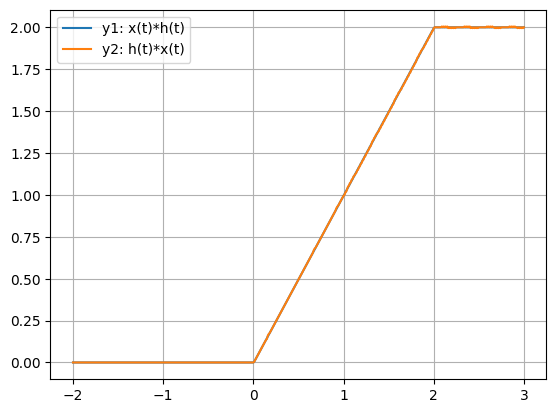

In [7]:
# Convolution test
import matplotlib.pyplot as plt

x_range = [x/100.0 for x in range(-200, 301)]

# Our x and h functions
x_func = rect_x_2
h_func = unit_step_1

# Convolve
y_one_values = convolve(x_func, h_func, x_range)
y_two_values = convolve(h_func, x_func, x_range)

# Plot
plt.plot(x_range, y_one_values, label='y1: x(t)*h(t)')
plt.plot(x_range, y_two_values, label='y2: h(t)*x(t)')

plt.legend()
plt.grid()